# Regressão Linear - Multiplas Variáveis

In [17]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Gerar Dataset

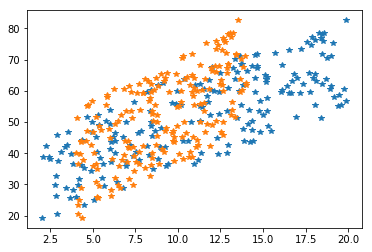

In [40]:
np.random.seed(101)

a = np.random.uniform(2, 20, 200)
b = np.random.uniform(4, 14, 200)

label = []
label = (2*a + 3*b + 2.2)

plt.plot(a, label, '*')
plt.plot(b, label, '*')

In [41]:
a_df = pd.DataFrame(data=a, columns=['A'])
b_df = pd.DataFrame(data=b, columns=['B'])
label_df = pd.DataFrame(data=label, columns=['LABEL'])

data = pd.concat([a_df, b_df], axis=1)
data.head()

,A,B
0,11.295175,8.530486
1,12.272017,6.006452
2,2.512536,10.311290
3,5.087390,4.177913
4,14.334986,12.385507


### Normalizando Dados

In [42]:
# data_norm = data.apply(lambda x: (x - x.min())/ (x.max() - x.min()) ).values
# label_norm = label_df.apply(lambda x: (x - x.min())/ (x.max() - x.min()) ).values

data_norm = data.values
label_norm = label_df.values

## Gerar Grafo - TensorFlow

In [43]:
n = 2 #number of features

batch_size = 8
W = tf.Variable(tf.zeros([n, 1]))
bias = tf.Variable(tf.zeros([1]))

x = tf.placeholder(tf.float32, [batch_size, n])
y = tf.placeholder(tf.float32, [batch_size, 1])

In [44]:
y_model = tf.matmul(x, W) + bias

In [45]:
cost = tf.reduce_sum(tf.square(y-y_model))

In [46]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
train = optimizer.minimize(cost)

In [47]:
init = tf.global_variables_initializer()

In [48]:
with tf.Session() as sess:
    sess.run(init)
    batches = 100000
    for _ in range(batches):
        rand_ind = np.random.randint(len(label_norm), size=batch_size)
        feed = {x:data_norm[rand_ind], y:label_norm[rand_ind]}
        sess.run(train, feed_dict=feed)
        
    ma, mb = sess.run([W, bias])
    

In [49]:
print(ma, mb)

[[ 2.00000048]
 [ 3.00000167]] [ 2.19999957]


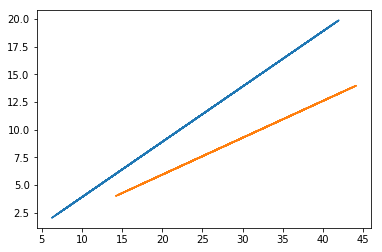

In [86]:
y_hat = np.array(ma).transpose()*np.array(data_norm) + mb
plt.plot(y_hat, data_norm)